# Introduction to Scikit-Learn (sklearn)

What we're going to cover: 
0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm
3. Fit the model and use it to make predictions on our data
4. Evaluating a model
5. Improve  a model
6. Save and load a trained model
7. Putting it all together!


## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#import warnings
#warnings.filterwarnings("default")

In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (labels)
y = heart_disease["target"]


In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# make a prediction 
y_preds = clf.predict(X_test)

In [8]:
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [9]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8360655737704918

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        34
           1       0.77      0.89      0.83        27

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [12]:
confusion_matrix(y_test,y_preds)

array([[27,  7],
       [ 3, 24]], dtype=int64)

In [13]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [14]:
# 5. Improve a model 
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 83.61%

Trying model with 20 estimators...
Model accuracy on test set: 86.89%

Trying model with 30 estimators...
Model accuracy on test set: 85.25%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 78.69%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 80.33%

Trying model with 90 estimators...
Model accuracy on test set: 78.69%



In [15]:
# 6. Save the model and lead it 
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

## 1. Getting our data ready to be sed with machine learning

Three main things we need to do:
    1. Split the data into features and labels (usually X and y)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical vlaues to numerical values (also called feature endcoding )

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [22]:
## 1.1 Make sure it's all numerical 

In [23]:
car_sales = pd.read_csv("Data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into train/test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [26]:
# Build machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model.fit(X_train, y_train)
#<model.score(X_test, y_test)

# Does not work becaus inputs are non numerical

In [27]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from  sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [28]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [29]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [30]:
# Alternative

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [31]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)

model.fit(X_train, y_train);

In [32]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether 

In [33]:
car_sales_missing= pd.read_csv("Data/car-sales-extended-missing-data.csv")

In [34]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
# Create X and y 
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [37]:
# Lets try and convert to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from  sklearn.compose import ColumnTransformer

#categorical_features = ["Make", "Colour", "Doors"]
#one_hot = OneHotEncoder()
#transformer = ColumnTransformer([("one_hot",
#                                  one_hot,
#                                categorical_features)],
#                               remainder="passthrough")
#transformed_X = transformer.fit_transform(X)
#transformed_X

### Fill missing data with Pandas

In [38]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
 
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [39]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
# Remove rows with missing prices value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [42]:
# Lets try and convert to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from  sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Fill missing values with Scikit-Learn

Mistake: Split train and test set before filling the nan (mean over both connects train and test set)

In [43]:
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")

In [44]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# Drop the rows with no labels 
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [46]:
# Create X and y 
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [47]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean 
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define colums
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transformed the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [48]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [49]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [50]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from  sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [51]:
# Now we've got our data as numbers and filled (no missing data)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for our problem 

Scikit uses estimator as another term for machin learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

[Choosing the right estimator cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### 2.1 Picking a machine learning model for a regression problem

In [52]:

# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [53]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [54]:
# How many samples? 
len(boston_df)

506

In [55]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6662221670168522

How do we improve the score? 

What if Ridge is not working?

In [56]:
# Let's try the Ranom Forest Regressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data 
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.7795471407858077

### 2.2 Choosing an estimator for a classification problem

In [57]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC

In [59]:
from sklearn.svm import LinearSVC
np.random.seed(42)

# Create the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the model
clf.score(X_test, y_test)

c:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7818930041152263

In [60]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
clf.score(X_test, y_test)

0.831275720164609

Tidbit: 
    
    1. If  you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

In [61]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

# Evaluate the model
clf.score(X_test, y_test)

0.831275720164609

### 3.2 Make predictions using machine learning model
2 ways to make predictions:

    1.`predict()`
    2. `predict_proba()`

In [62]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1], dtype=int64)

In [63]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1], dtype=int64)

In [64]:
# Compare predictions to truth labels to evaluate the model 
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.831275720164609

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.831275720164609

Make predictions with predict_proba()


In [66]:
# predict_proba returns probabilities of a classifiction label
clf.predict_proba(X_test[:5])

array([[0.93, 0.07],
       [0.42, 0.58],
       [0.33, 0.67],
       [0.88, 0.12],
       [0.23, 0.77]])

In [67]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data 
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Instantiate model
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

In [68]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [69]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating the machine learning model#

1. Estimator score method
2. The scoring parameter
3. Problem-specific metric functions 

### 4.1 Evaluation with the score method

In [70]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
clf.score(X_train, y_train)

1.0

In [72]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but with regression 

In [73]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data 
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Instantiate model
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

In [74]:
clf.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating the model with the scoring paramter

In [75]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [76]:
clf.score(X_test, y_test)

0.8524590163934426

In [77]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

cross_val_score splits the data set in training and test set `cv` times
and returns the score for each one

In [78]:
np.random.seed(42)

# Singel training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the meand of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [79]:
# Scoring parameter set to None by default -> mean accuracy is default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics 

1. Accuracy 
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)
# Cross validated accuracy 
np.mean(cross_val_score)

0.8248087431693989

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under cruve (AUC)
* ROC curve

ROC curves are a comparision of a model's ture positive rate (tpr) 
versus a models false positive rate (fpr).



In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)


In [82]:
from sklearn.metrics import roc_curve
# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probablilities 
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [83]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [84]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false postive rates 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [85]:
thresholds

array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

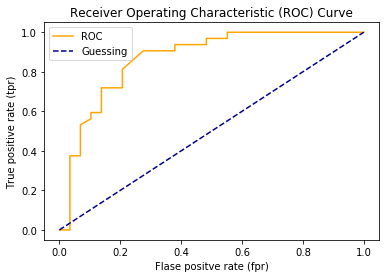

In [86]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr: "false postive rate", tpr: "true postive rate"):
    """Plots a Roc curve of a model """
    
    # Plot roc cruve 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    #Plot line with no predictive power (baseline)
    
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("Flase positve rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [87]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

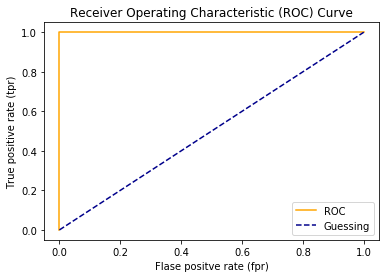

In [88]:
# Plot perfect ROC curve and AUC score

fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [89]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

Quick way to compare the labels a model predicts 
and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [90]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [91]:
# Visualize confusion matirx with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


**Import packages in a jupyter notebook**

`import sys`
`!pip install ...`

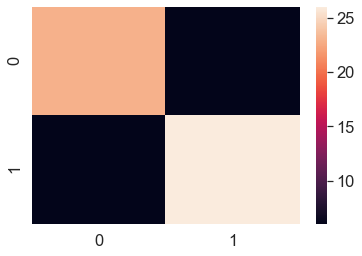

In [92]:
# Make our confusion matirx more visula with Seaborn's heatmap
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

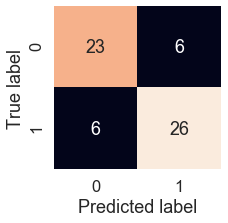

In [93]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's hearmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(conf_mat)

**Classification Report**

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



To summarize classification metrics:

* Accuracy is a good measure to start with if all classes are balanced

* Precision and recall become more important when classes are imbalanced
* F1-score is a combination of precision and recall 

### 4.2.2 Regresion model evaluation metrics

1. R^2 or coefficient of determination
2. Mean absoulte error 
3. Mean squared error

**R^2**
What R^2 does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of nubmers it's R^2 is 1. 

In [95]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [96]:
model.score(X_test, y_test)

0.8654448653350507

In [97]:
from sklearn.metrics import r2_score

# Fill an array y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [98]:
r2_score(y_test, y_test_mean)

0.0

In [99]:
r2_score(y_test, y_test)

1.0

Skiped **Mean absoulute error** and **Mean squared error**

### 4.2.3 Finally using the `scoring` parameter

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [101]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [102]:
# Corss-validated accuracy
np.mean(cv_acc)

0.8248087431693989

In [103]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
np.mean(cv_acc)

0.8248087431693989

In [104]:
# Precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8329547346025924

In [105]:
# F1 
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8426854603423346

How about a regression model?

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [107]:
# R^2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
np.mean(cv_r2)

0.6243870737930857

In [108]:
# Mean absolute error 
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [109]:
### 4.3 Using different evalutation metrics as Scikit-Learn function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)


X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

y_preds = clf.predict(X_test)


# Evaluate the classifier 
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
      

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485


## 5. Improving a model 

First prediction = baseline predictions.
First model = baseline model.

From a data perspective: 
* Could we collect more data? (generally, the more data the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we imprve the current model?

Three ways to adjust hyperparamters:
1. By hand
2. Randomly wtih RandomSearchCV
3. Exhaustively with GridSearchCV

In [110]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparamters by hand 

Let's make a train, validation and test set

In [111]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [112]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation on y_true labels vs. y_pred labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%" )
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 score: {f1:.2f}%")
    
    return metric_dict

In [124]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y 
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))


valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))



X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions 
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validdation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
F1 score: 0.85%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [128]:
np.random.seed(42)

# Create a different clf with different hyperparameters 

clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84%
Recall: 0.84%
F1 score: 0.84%


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [130]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 300],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}

# Split into X and y 

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearcheCV version of clf 

rs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=300, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=1200, min_samples_

[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=300, total=   0.6s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=300 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=300, total=   0.6s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=300 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=300, total=   0.6s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=300 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=300, total=   0.6s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=300 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=300, total=   0.6s
[CV] n_estimators=500, min_samples_split=4,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   35.7s finished


In [131]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 300}

In [132]:
# Make predictions with the bset hyperparamters 
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 80.33%
Precision: 0.78%
Recall: 0.88%
F1 score: 0.82%


### 5.3 Hyperparameter tuning with GridSearchCV


In [133]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 300],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [134]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [136]:
from sklearn.model_selection import GridSearchCV

# Split into X and y 

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)

# Fit the GridSearchCV version of clf 

gs_clf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_esti

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   19.1s finished


In [137]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [138]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.82%
Recall: 0.79%
F1 score: 0.81%


Let's compare our different model metrics. 

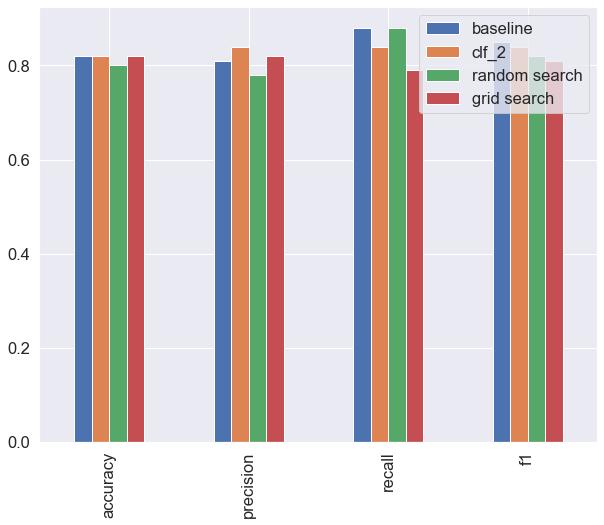

In [139]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))